# Importations

In [11]:
from utils.utils_dq import * 
%matplotlib inline


### Load the environment 


In [4]:
with open('./checkpoints/env.pickle', 'rb') as f:
    env = pickle.load(f)


# Compare results for different pre-processing

In [19]:
def compare_conversion(name, param_deep_Q, epochs = [1, 100,1000 , 10000]) : 
    '''
    Inputs : 
    
    name : The name of the conversion to be done on the states
    param_deep_Q : The hyperparameters for the deep q learning algorithm
    
    Output : Plot of the q_table before and after 100 and 1000 epochs and the list of agents 
    
    '''
    
    param_deep_Q['state_dim'] = dict_conversion[name]
    param_deep_Q['name_conversion_state'] = name
    
    list_agents = []
    
    q_tables = [   ]
    
    rewards = []
    
    for i in epochs : 
        param_deep_Q['max_iter'] = i
        param_deep_Q['model'] = LinearModel( param_deep_Q['state_dim'],CATALOGUE_SIZE)
        agent, reward = deep_q_learning(**param_deep_Q)
        list_agents.append(agent)
        q_table = agent.evaluate_q_values(np.arange(50))
        q_tables.append(q_table)
        rewards.append(reward)
        
    
    
    return q_tables,rewards,list_agents
    
    
    
    
    
    
    

In [20]:
def plot_result_deep_q(epochs,name, q_tables, rewards,list_agents, param_deep_Q, rm) : 
    # Plot the q_table for the different epochs, the reward matrix and the rewards and loss
    
    n = len(epochs)
    f, axs = plt.subplots(1,n,figsize=(20,10))
    axs = axs.reshape(-1,1)
    
    for i in range(n) : 

        axs[i][0].imshow(q_tables[i])
        axs[i][0].set_xlabel('Actions')
        axs[i][0].set_ylabel('States')
        axs[i][0].set_title('Q_table for {} epochs'.format(epochs[i]))
        

    plt.suptitle('Comparison of q_tables for conversion : {}'.format(name), size=20)    
        
    plt.show()
    
    print('Matrix reward')
    plot_q_table(get_matrix_rewards(param_deep_Q['env']))
    
    plot_reward_loss(rewards[-1],list_agents[-1].all_loss,run_mean=rm)
    
    

In [21]:
# Parameters for the deep Q learning algorithm
param_deep_Q = {
    'env' : env,\
    'state_dim' : dict_conversion['identity'] ,\
    'name_conversion_state' : 'identity',\
    'mem_size': 50,\
    'gamma' : 0 ,\
    'epsilon' : 0.1 ,\
    'learning_rate' : 1e-5,\
    'max_iter' : 100 , \
    'batch_size' : 10 ,
    'name' : 'test_model',\
    'model' : LinearModel(1,CATALOGUE_SIZE)
}


In [22]:
dict_results =  {}

## 2. One hot encoding 

$$ \LARGE \Phi(S_t = i ) = [ 0, ... , 1, ... 0         ]   $$

In [30]:
dict_results['hot_encoding'] = compare_conversion('hot_encoding', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

Episode: 9999/10000, Reward : 4


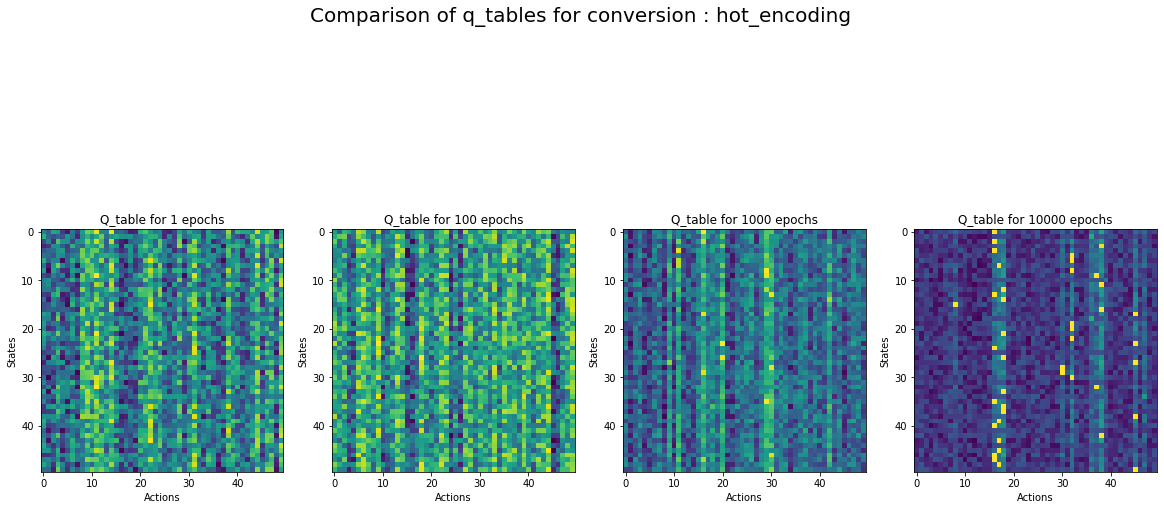

Matrix reward


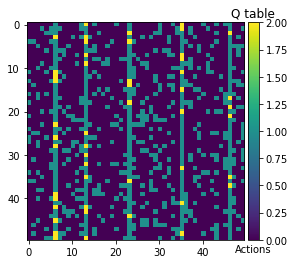

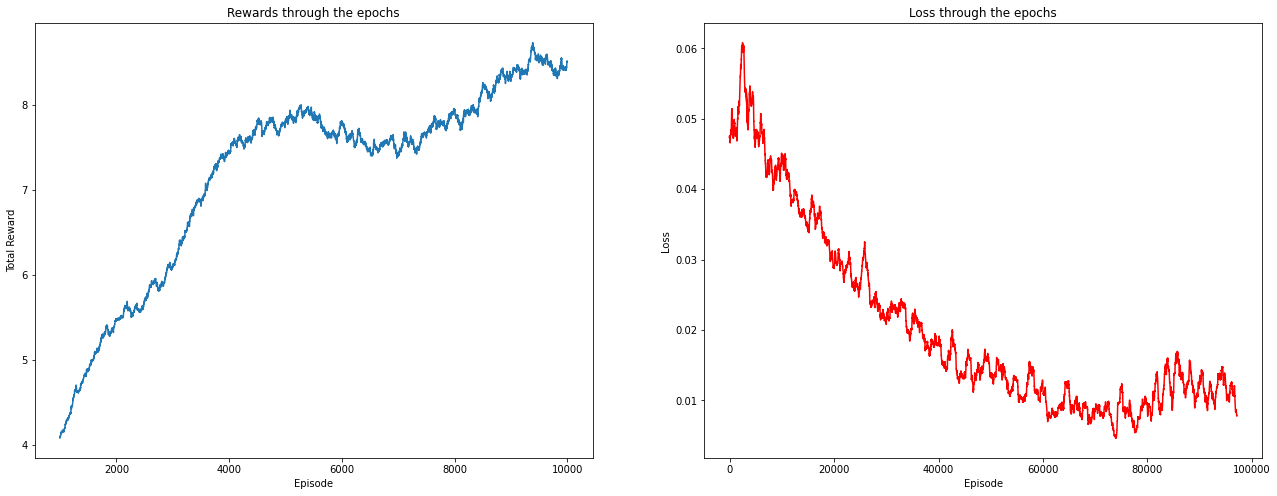

In [31]:

plot_result_deep_q([1, 100,1000 , 10000],'hot_encoding', *dict_results['hot_encoding'],\
                   param_deep_Q, rm = 1000)

## 4. U matrix



In [89]:
dict_results['u'] = compare_conversion('u', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

Episode: 9999/10000, Reward : 2


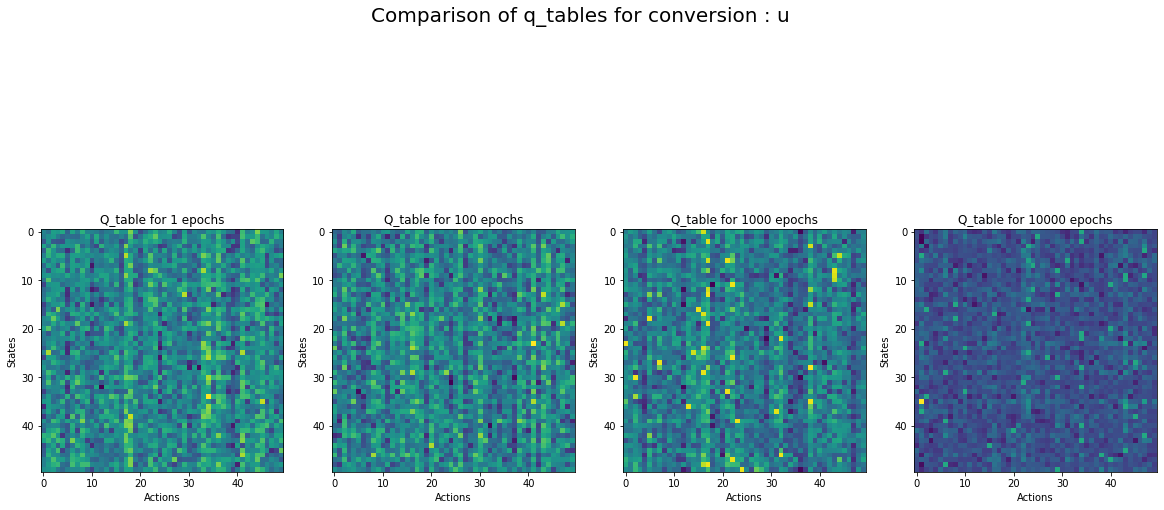

Matrix reward


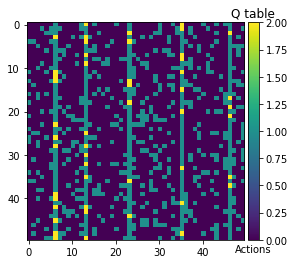

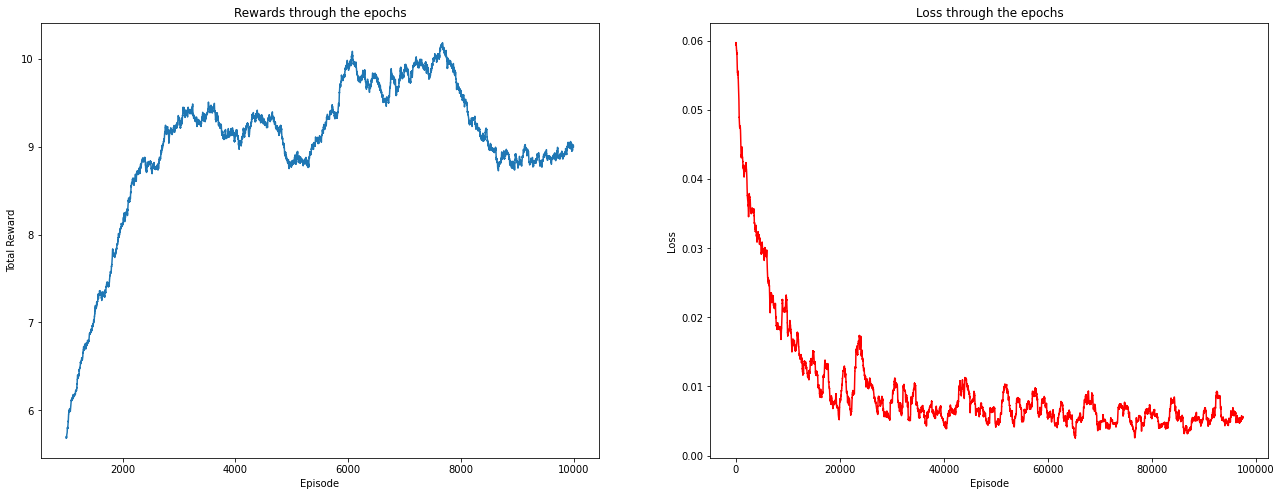

In [90]:

plot_result_deep_q([1, 100,1000 , 10000],'u', *dict_results['u'],\
                   param_deep_Q, rm = 1000)

### 4.2 U relevant indexes


$$ \LARGE \Phi(S_t = i ) = (\delta_{i,j})_{1 \le j \le n  } \text{ where } \delta_{i,j}
\begin{cases}
    1& \text{if } u_{i,j} \ne 0   \\
    0             & \text{otherwise}
\end{cases}  $$

In [32]:
dict_results['u_hot'] = compare_conversion('u_hot', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

Episode: 9999/10000, Reward : 8


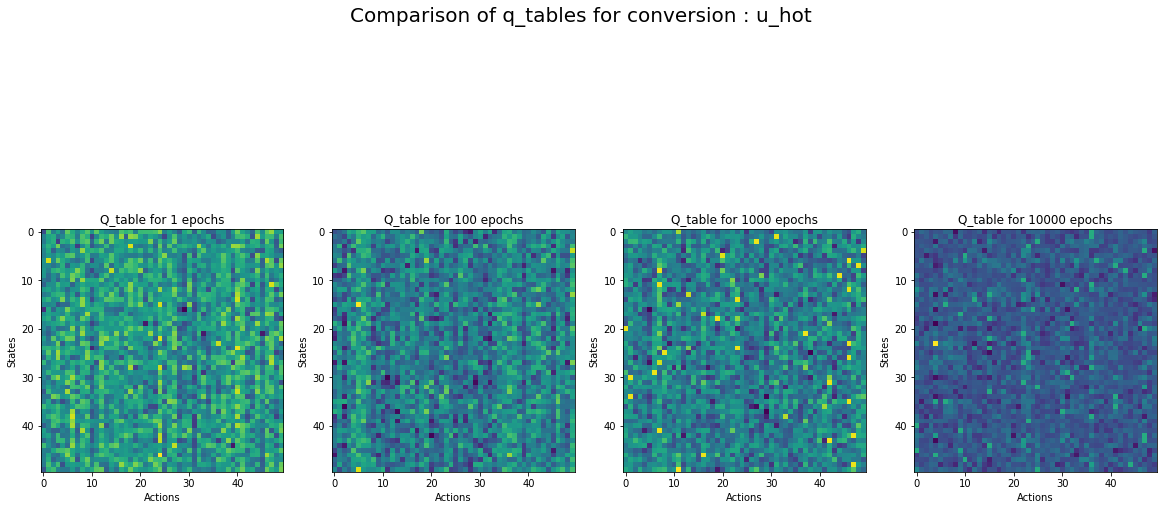

Matrix reward


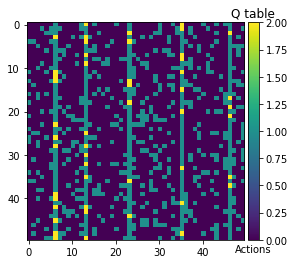

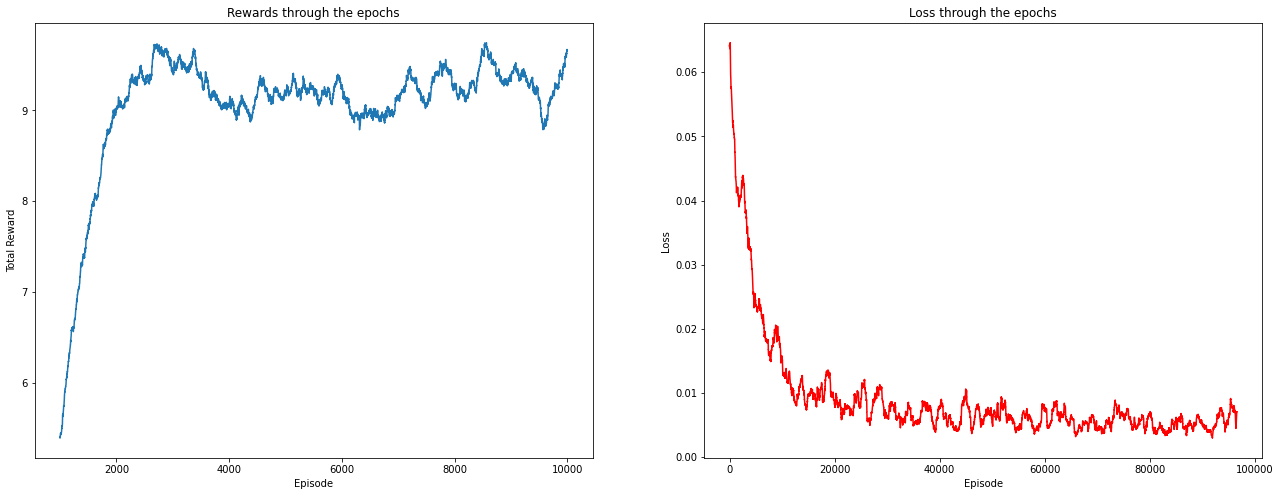

In [33]:

plot_result_deep_q([1, 100,1000 , 10000],'u_hot', *dict_results['u_hot'],\
                   param_deep_Q, rm = 1000)

## 5. Rewards


$$ \LARGE \Phi(S_t = i ) = (\delta_{i,j})_{1 \le j \le n  } \text{ where } \delta_{i,j} 
\begin{cases}
    2& \text{if j is cached and related}   \\
    1 & \text{if j is cached and not related or related and not cached} \\
    0 & \text{otherwise} 
\end{cases}  $$

In [34]:
dict_results['rewards'] = compare_conversion('rewards', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

Episode: 9999/10000, Reward : 28


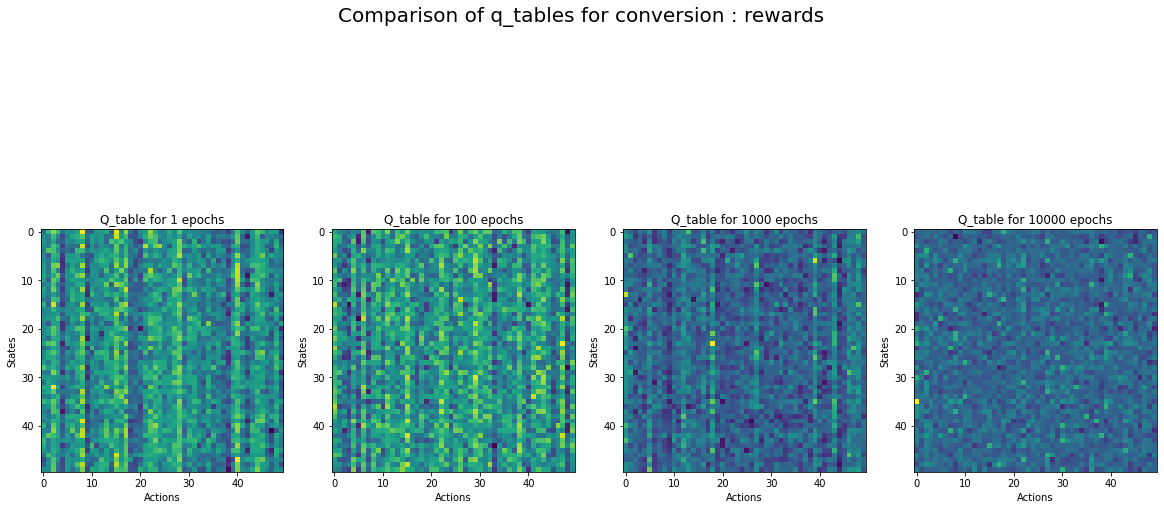

Matrix reward


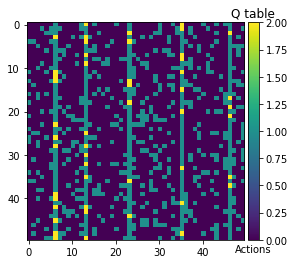

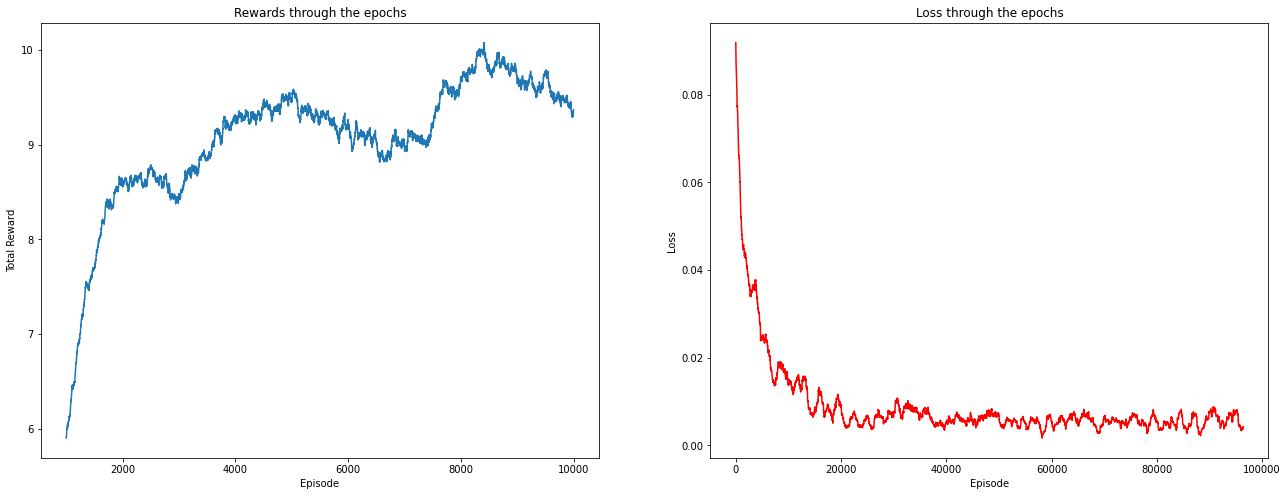

In [35]:

plot_result_deep_q([1, 100,1000 , 10000],'rewards', *dict_results['rewards'],\
                   param_deep_Q, rm = 1000)

In [42]:
# To save the models

# with open('./checkpoints/linear_gamma_0.pickle', 'wb') as f:
#     pickle.dump([dict_results, param_deep_Q], f)


/usr/local/lib/python3.7/site-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


In [12]:
# To load the models 
with open('./checkpoints/linear_gamma_0.pickle', 'rb') as f:
    [dict_results, param_deep_Q] = pickle.load(f)


In [23]:
def plot_different_loss(all_loss, rewards, names, rm_loss, rm_reward, title ) :
    
    f, axs = plt.subplots(1,2,figsize=(16,8))
    axs = axs.reshape(-1,1)
#     plt.subplots_adjust(left=0.125, bottom=0, right=1.9, top=1, wspace=0.1, hspace=0.3)
    
    for i,loss in enumerate(all_loss) : 

        reward = [x[1] for x in rewards[i]]
        
        
        
        smoothed_loss = running_mean(loss, rm_loss)
        smoothed_reward = running_mean( reward , rm_reward)
        
        axs[1][0].plot(smoothed_loss, label=names[i])
            
        axs[0][0].plot(smoothed_reward, label = names[i])
        
        
    axs[1][0].set_xlabel('Number of iteration')
    axs[1][0].set_ylabel('Loss (running mean of size : {})'.format(rm_loss))
    axs[1][0].legend()
    axs[1][0].grid(True)
    
    axs[0][0].set_xlabel('Epochs')
    axs[0][0].set_ylabel('Rewards (running mean of size : {})'.format(rm_reward))
    axs[0][0].legend()
    axs[0][0].grid(True)
    
    f.suptitle(title)
        
    plt.show()
    
    

In [13]:
all_loss_linear_0 = [dict_results[x][2][-1].all_loss for x in dict_results]
all_rewards_linear_0 = [dict_results[x][1][-1] for x in dict_results]


In [14]:
param_linear_0 = {
    'all_loss' : all_loss_linear_0,
    'rewards' : all_rewards_linear_0,
    'names' : [x for x in dict_results],
    'rm_loss' : 10000,\
    'rm_reward' : 1000,\
    'title' : 'Rewards and Loss for Linear model with gamma = 0' 
}

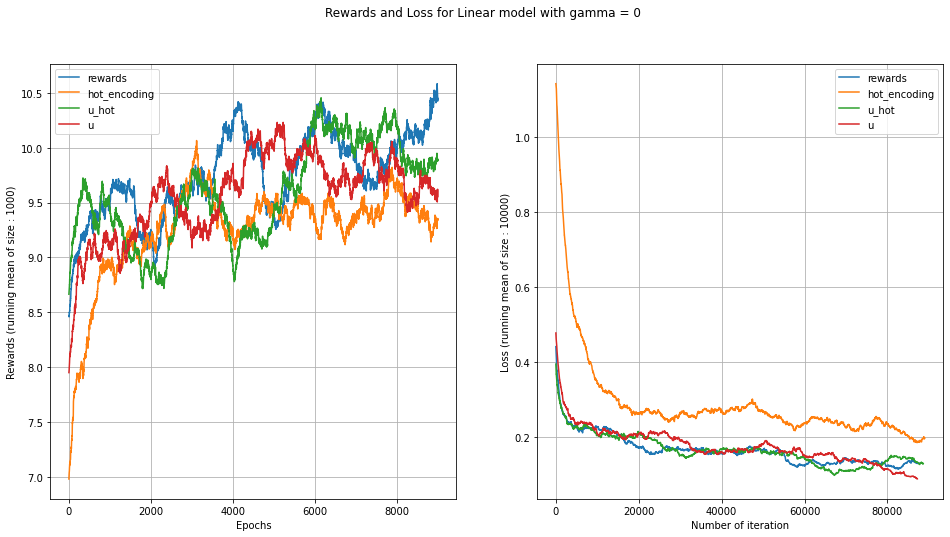

In [15]:
plot_different_loss(**param_linear_0)

In [25]:
def plot_result_deep_q(epochs,name, q_tables, rewards,list_agents, param_deep_Q, rm) : 
    # Plot the q_table for the different epochs, the reward matrix and the rewards and loss
    
    n = len(epochs)
    f, axs = plt.subplots(1,n,figsize=(20,10))
    axs = axs.reshape(-1,1)
    
    for i in range(n) : 

        axs[i][0].imshow(q_tables[i])
        axs[i][0].set_xlabel('Actions')
        axs[i][0].set_ylabel('States')
        axs[i][0].set_title('Q_table for {} epochs'.format(epochs[i]))
        

    plt.suptitle('Comparison of q_tables for conversion : {}'.format(name), size=20)    
        
    plt.show()
    
    print('Matrix reward')
    plot_q_table(get_matrix_rewards(param_deep_Q['env']))
    
    plot_reward_loss(rewards[-1],list_agents[-1].all_loss,run_mean=rm)
    
    

In [26]:
def compare_q_tables(q_tables, names, title) : 
    
    n = len(q_tables)
    f, axs = plt.subplots(1,n,figsize=(20,10))
    axs = axs.reshape(-1,1)
    
    for i in range(n) : 
        axs[i][0].imshow(q_tables[i])
        axs[i][0].set_xlabel('Actions')
        axs[i][0].set_ylabel('States')
        axs[i][0].set_title('Q_table for state representation : {}'.format(names[i]))
    
    
    f.suptitle(title)
    
    plt.show()
    
    
    

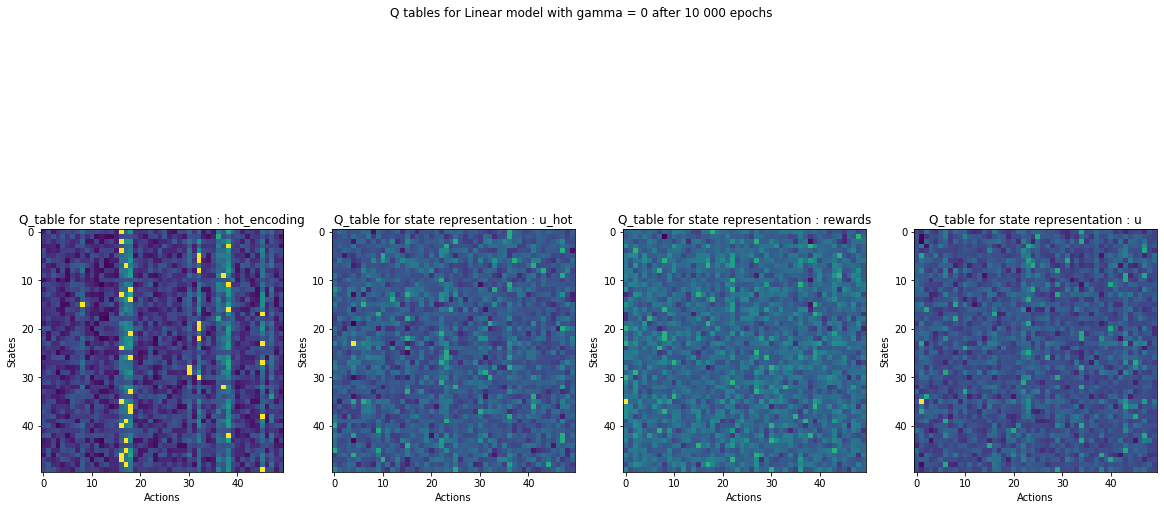

In [110]:
compare_q_tables([dict_results[x][0][-1] for x in dict_results], [x for x in dict_results],\
                'Q tables for Linear model with gamma = 0 after 10 000 epochs')

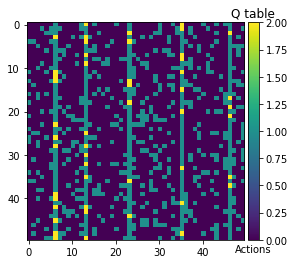

In [111]:
plot_q_table(get_matrix_rewards(env))

In [31]:
param_deep_Q['gamma'] = 0.9
param_deep_Q['learning_rate'] = 1e-4

In [32]:
dict_results_09 =  {}


## 2. One hot encoding 

$$ \LARGE \Phi(S_t = i ) = [ 0, ... , 1, ... 0         ]   $$

In [33]:
dict_results_09['hot_encoding'] = compare_conversion('hot_encoding', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

Episode: 9999/10000, Reward : 3


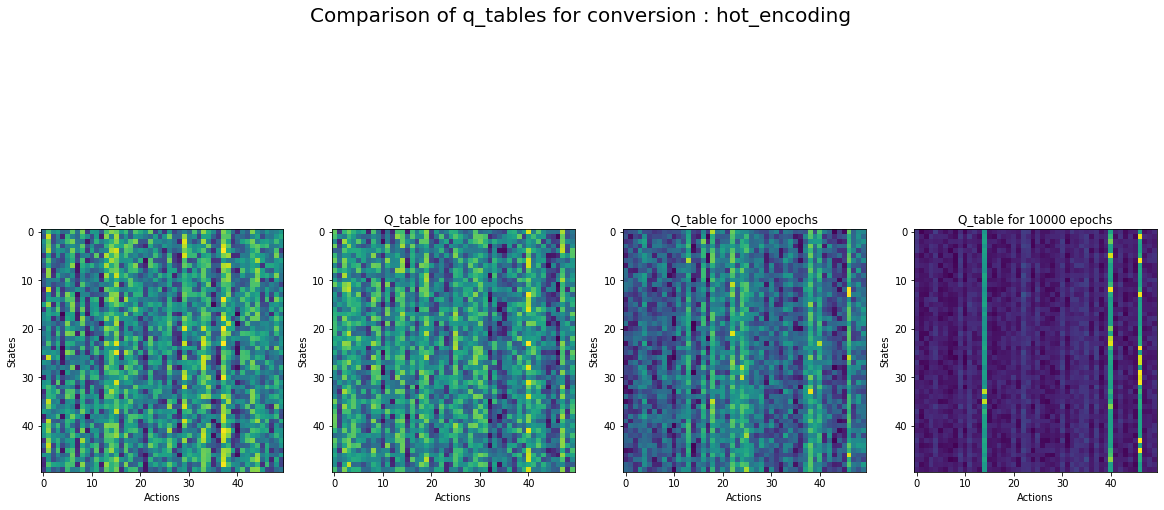

Matrix reward


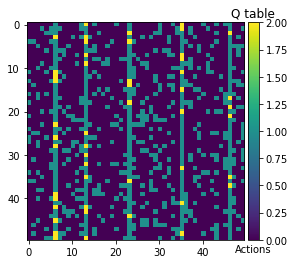

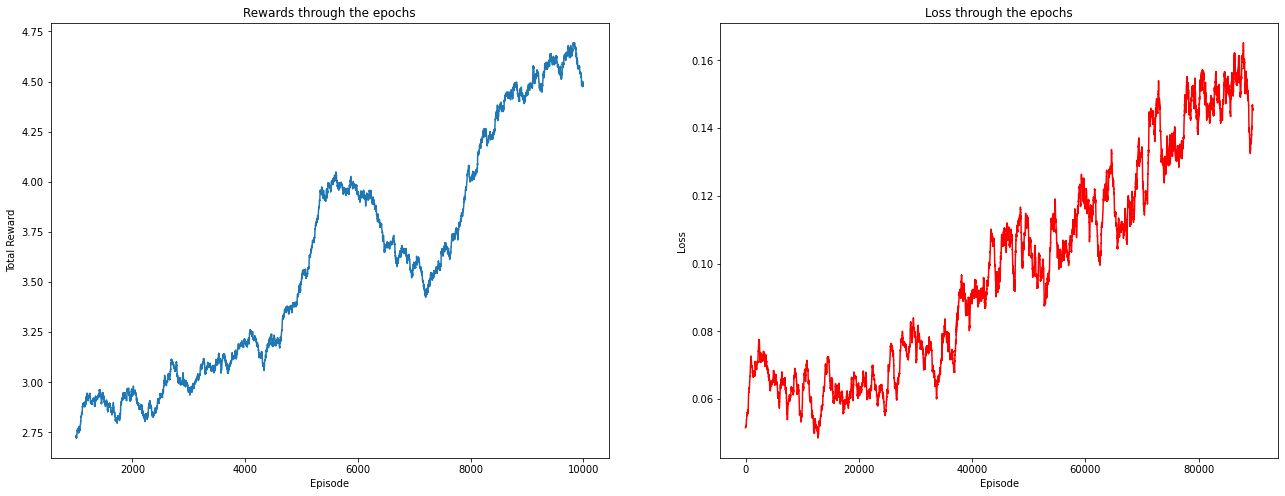

In [34]:

plot_result_deep_q([1, 100,1000 , 10000],'hot_encoding', *dict_results_09['hot_encoding'],\
                   param_deep_Q, rm = 1000)

## 4. U matrix



### 4.2 U relevant indexes


$$ \LARGE \Phi(S_t = i ) = (\delta_{i,j})_{1 \le j \le n  } \text{ where } \delta_{i,j}
\begin{cases}
    1& \text{if } u_{i,j} \ne 0   \\
    0             & \text{otherwise}
\end{cases}  $$

In [35]:
dict_results_09['u_hot'] = compare_conversion('u_hot', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

Episode: 9999/10000, Reward : 10


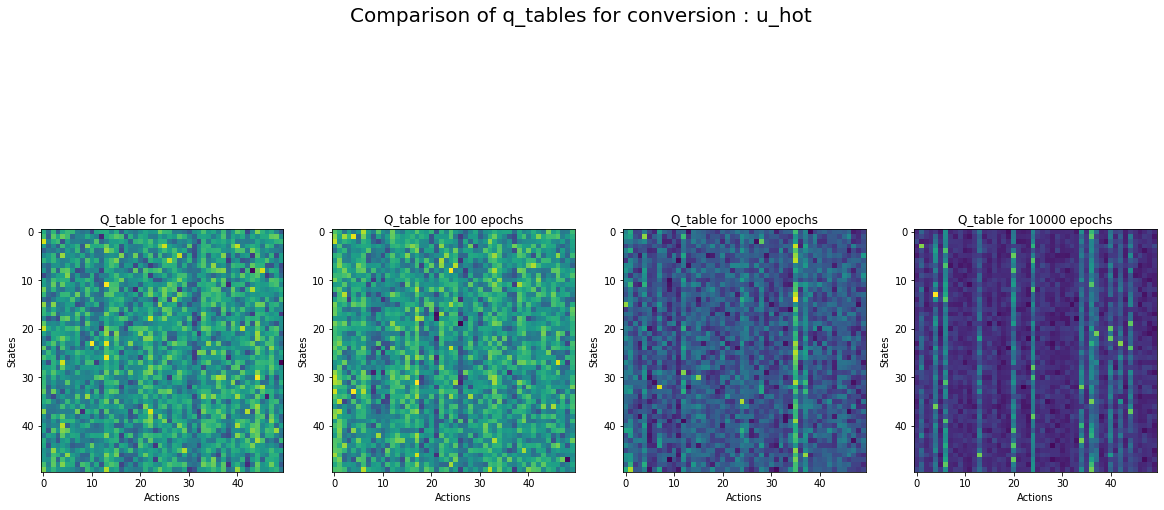

Matrix reward


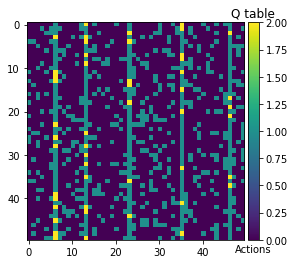

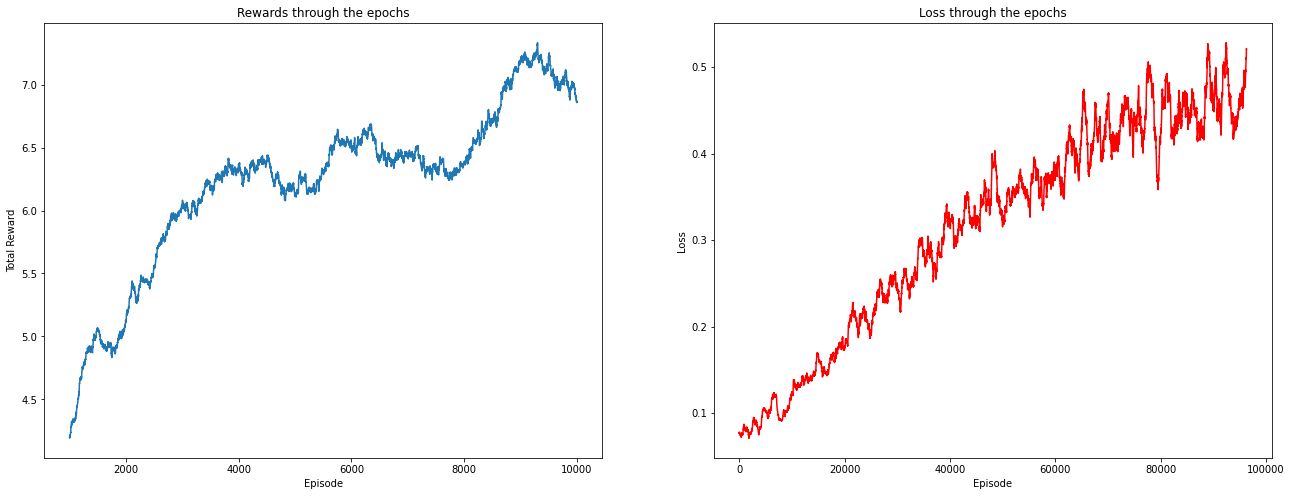

In [36]:

plot_result_deep_q([1, 100,1000 , 10000],'u_hot', *dict_results_09['u_hot'],\
                   param_deep_Q, rm = 1000)

## 5. Rewards


$$ \LARGE \Phi(S_t = i ) = (\delta_{i,j})_{1 \le j \le n  } \text{ where } \delta_{i,j} 
\begin{cases}
    2& \text{if j is cached and related}   \\
    1 & \text{if j is cached and not related or related and not cached} \\
    0 & \text{otherwise} 
\end{cases}  $$

In [37]:
dict_results_09['rewards'] = compare_conversion('rewards', param_deep_Q,\
                                                  epochs = [1, 100,1000 , 10000])

Episode: 9999/10000, Reward : 4


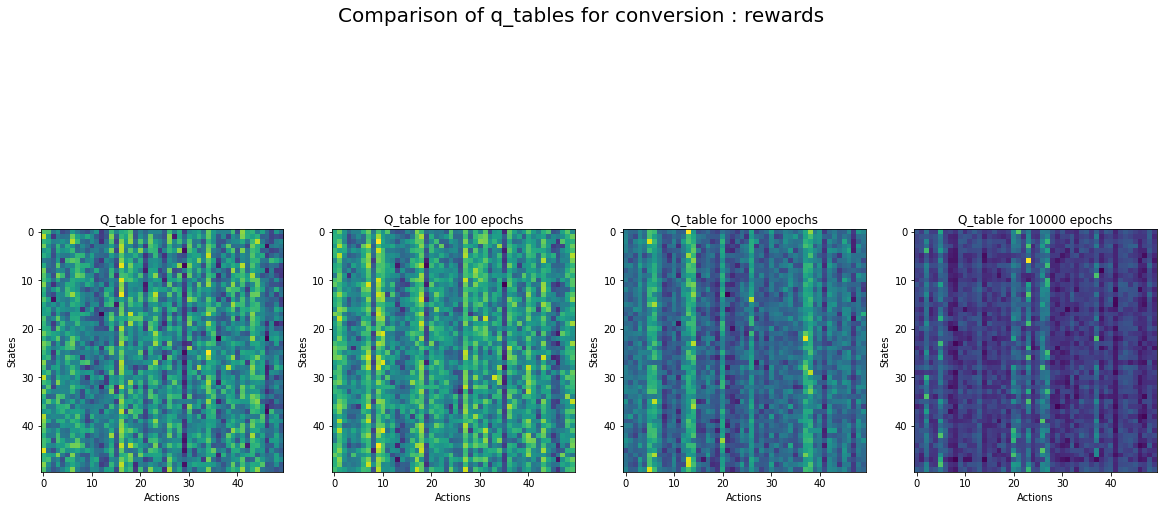

Matrix reward


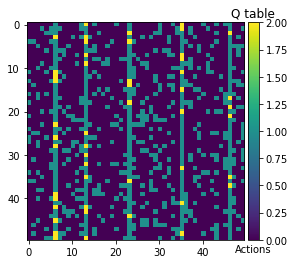

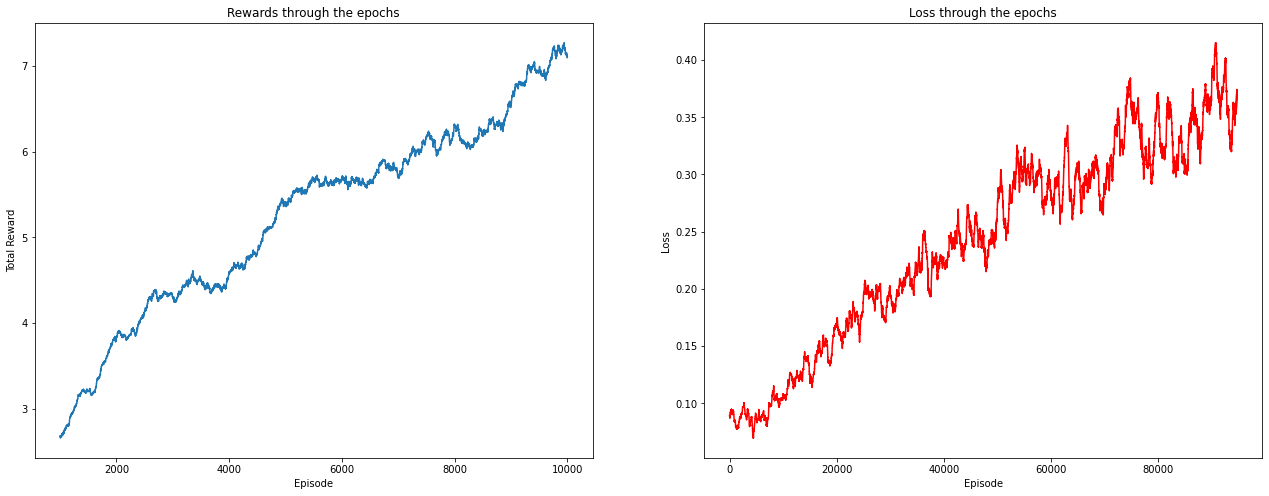

In [38]:

plot_result_deep_q([1, 100,1000 , 10000],'rewards', *dict_results_09['rewards'],\
                   param_deep_Q, rm = 1000)

In [40]:
# To save
# with open('linear_gamma_09.pickle', 'wb') as f:
#     pickle.dump([dict_results_09, param_deep_Q], f)